## CPE311 Computational Thinking with Python

Name: Kurt Gabriel A. Anduque

Performed on: 04/13/2025

Submitted on: 04/13/2025

Submitted to: Engr. Roman M. Richard

# Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section

# Resources:

Download the following datasets: fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv, earthquakes-1.csv 

# Procedures:
    9.4 Introduction to Seaborn
    
    9.5 Formatting Plots
    
    9.6 Customizing Visualizations

# 9.4 Introduction to Seaborn

## Introduction to Seaborn

## About the Data

In this notebook, we will be working with 2 datasets:

    Facebook's stock price throughout 2018 (obtained using the stock_analysis package)
    
    Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)

## Setup

In [1]:
import matplotlib.pyplot as plt # used to create visualizations
import numpy as np # used to 
import seaborn as sns
import pandas as pd
%matplotlib inline 
# used to not always type show()
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')

## Categorical data

A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards. Let's take a look at some visualizations to understand
what magTypes are used in Indonesia, the range of magnitudes there, and how many of the earthquakes are accompanied by a tsunami.

In [2]:
quakes.assign(time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
"parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5")
# this converts the time column to a datatime value
# then sets the time column as the index and uses data indexing
# to take the '2018-09-28' index in the dataframe
# and the rows in those collected index
# that has Indonesia in the 'parsed_place' column
# tsunami with a 1 value
# and a 7.5 value in mag
# all those must be met

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


# stripplot()

The stripplot() function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a
column of our data (with the hue parameter). Using a strip plot, we can see points for each earthquake that was measured with a given magType and what its magnitude
was; however, it isn't too easy to see density of the points due to overlap:

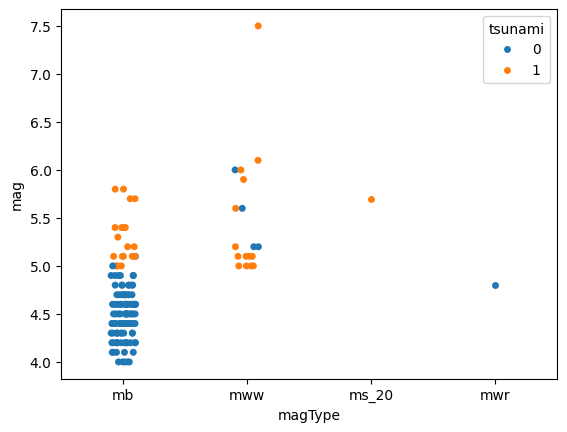

In [12]:
sns.stripplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)
# this create a stripplot
# using the magType as the x axis
# the tsunami column is the indicator for
# the the color of the plot entries
# and the data from the quakes data with the 
# parsed_place entries containing Indonesia
plt.show()

# swarmplot()

The bee swarm plot helps address this issue be keeping the points from overlapping. Notice how many more points we can see for the blue section of the mb magType :

C:\Users\Arnel Bulambao\.conda\envs\CPE311_BULAMBAO\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


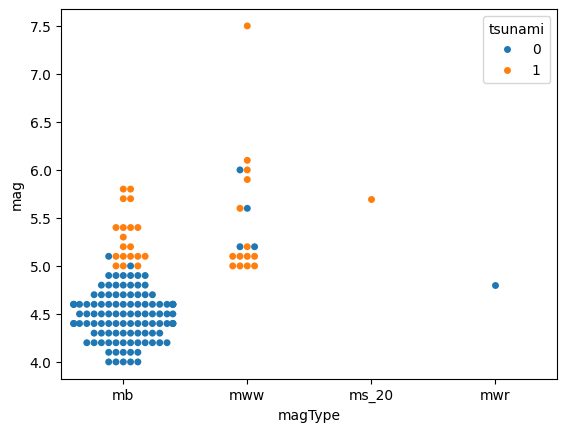

In [13]:
sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)
# this create a swarmplot
# using the magType as the x axis
# the tsunami column is the indicator for
# the the color of the plot entries
# and the data from the quakes data with the 
# parsed_place entries containing Indonesia
plt.show()

# Correlations and Heatmaps

## heatmap()

An easier way to create correlation matrix is to use seaborn :


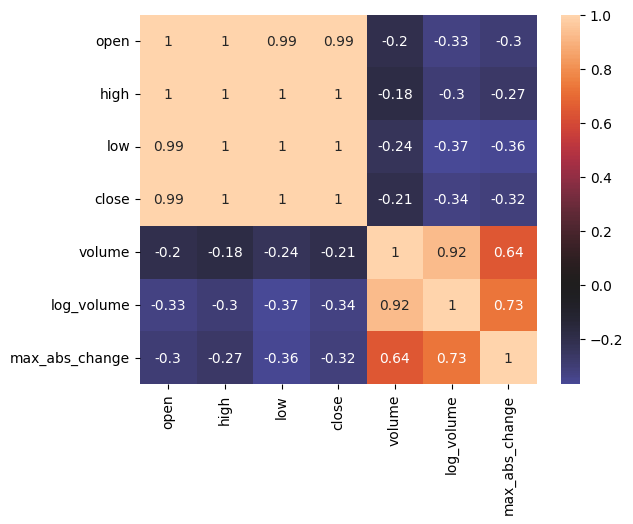

In [14]:
sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).corr(),
 annot=True, center=0
)

# this create a heatmap
# it first sorts the index of the fb dataframe
# then assigning new columns
# the log_volume column is the natural logarithm 
# of the values in the volume column
# and the max_abs_change
# is the difference of the values in the high column
# and the low column of the fb dataframe
plt.show()

# pairplot()

The pair plot is seaborn's answer to the scatter matrix we saw in the pandas subplotting notebook:


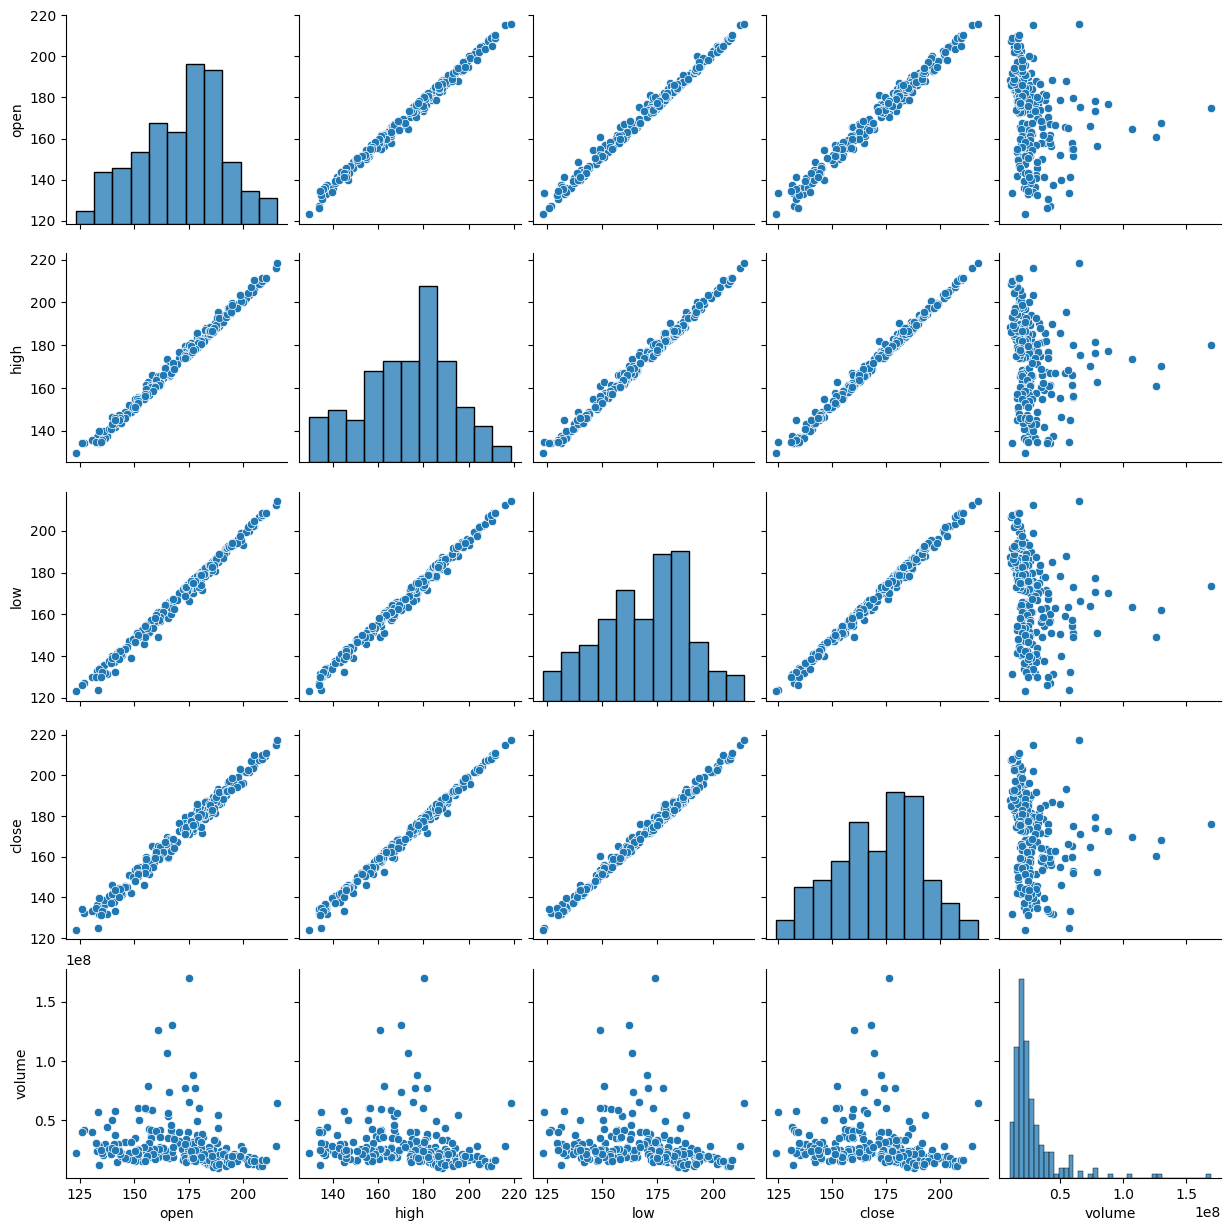

In [17]:
sns.pairplot(fb)
# creates plots relationships
# from each column with numerical values
plt.show()

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the
same shape):


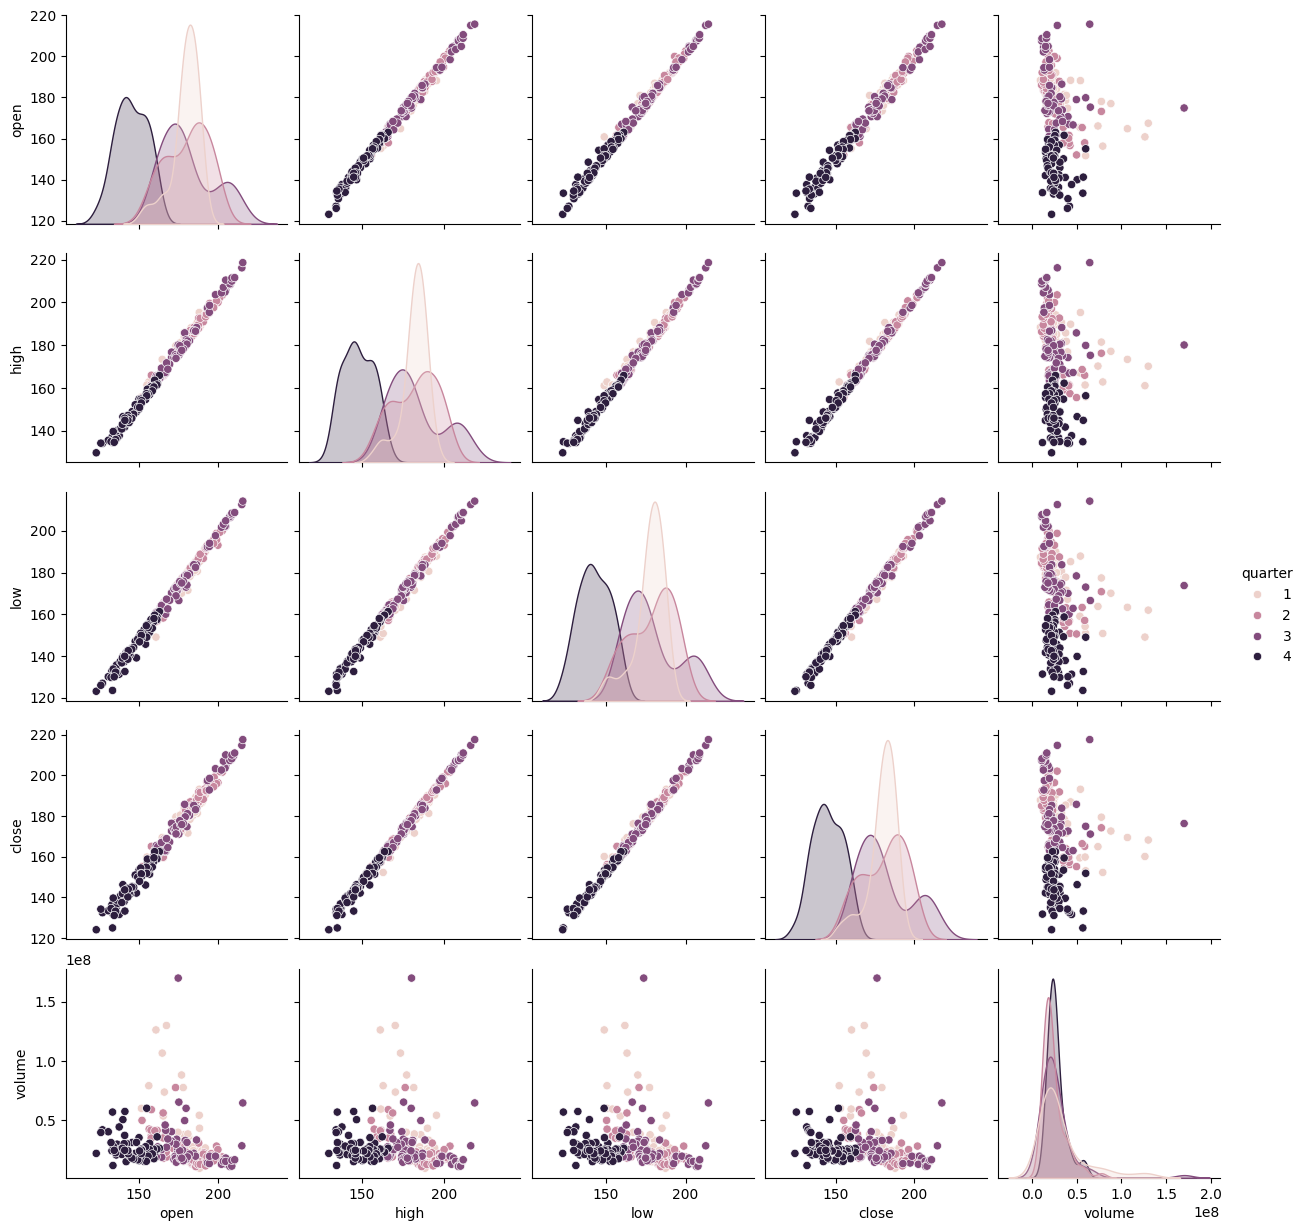

In [19]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)
#this creates a new column in the the fb dataframe
# that groups each entries by datetime
# then create a pairplot but in a form
# of KDE and uses a new colour

plt.show()

# jointplot()

The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at
the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

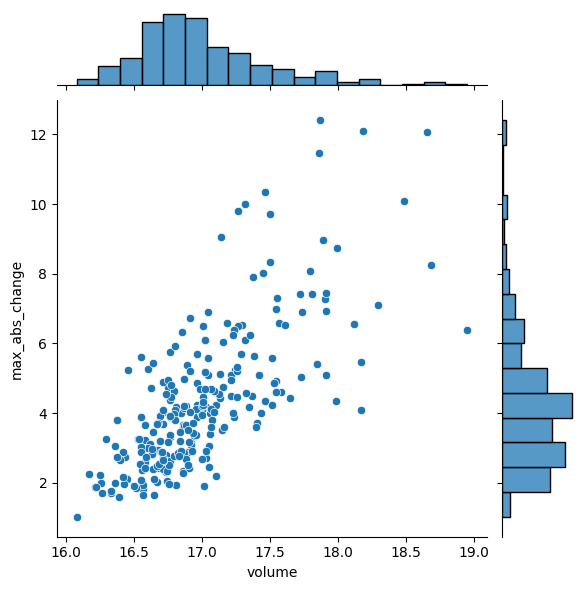

In [22]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

# this creates a joinplot
# the volume as the x value
# it changes temporarily the volume column
# with the logarithm of its values
# and a temporary column which is the difference of the high and low columns
# as its data as the y axis value

plt.show()

By changing the kind argument, we can change how the center of the plot is displayed. For example, we can pass kind='hex' for hexbins:

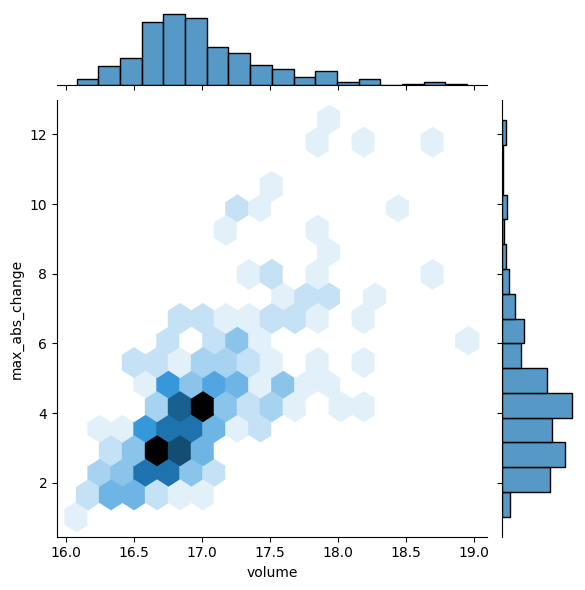

In [24]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

# this does the same as the one above it
# but it instead uses a hex kind
# it shows the plot points as hexagons
# the darker the hexagon the higher the value

plt.show()


If we specify kind='reg' instead, we get a regression line in the center and KDEs on the sides:

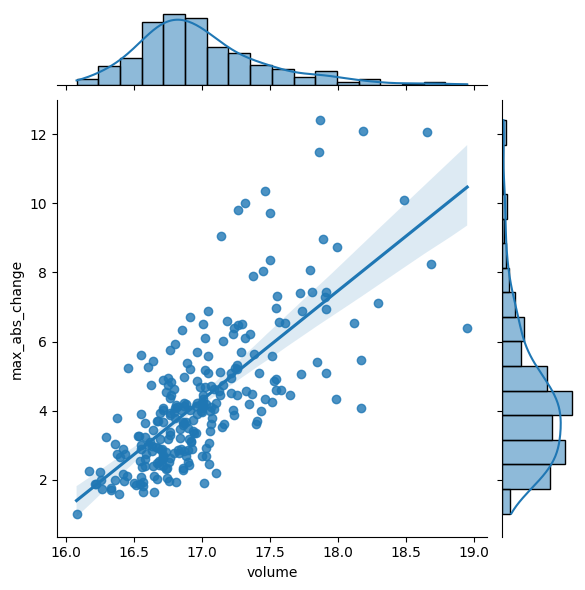

In [26]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

# this is the same as the code made two cells above
# the  kind='reg', just puts a regression line in the graph


plt.show()

If we pass kind='resid' , we get the residuals from the aforementioned regression:

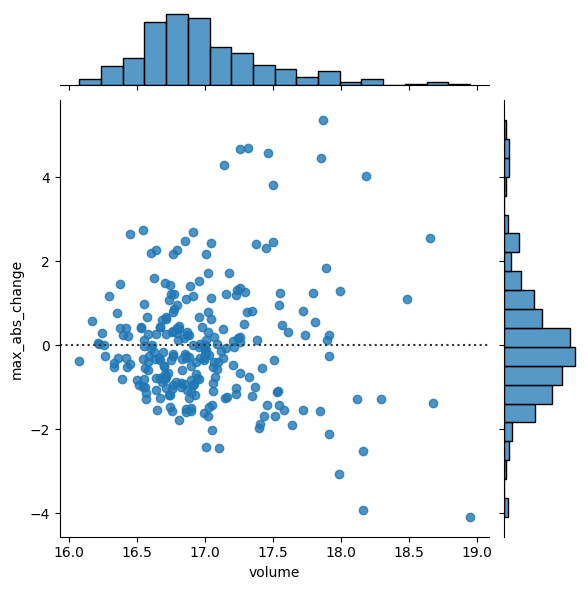

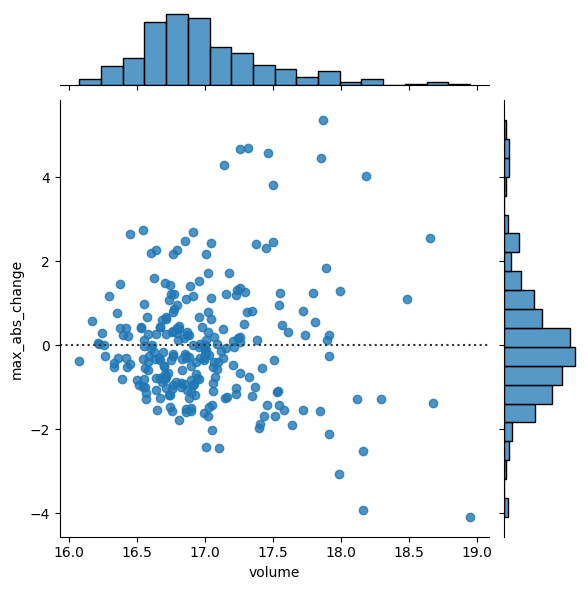

In [28]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

# this creates a residual plot for the graph
# 

plt.show()

Finally, if we pass kind='kde' , we get a contour plot of the joint density estimate with KDEs along the sides:

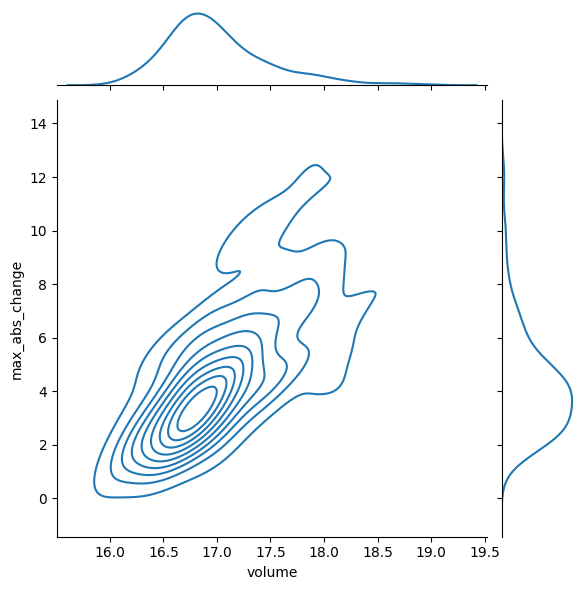

In [29]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

#this shows the graph in a kde format


plt.show()

## Regression plots

We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high
stock price - daily low stock price). To do so, we first need to isolate this data:

In [31]:
fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

#this creates a new dataframe with the the fb dataframe
# but changed the volume with the logarithm of its value
# and a new column that contains the difference of the high and low columns

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy
in Python with itertools , so let's import it:

In [32]:
import itertools

itertools gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from itertools ; notice how the second loop doesn't
do anything:

In [33]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


The reg_resid_plots() function from the reg_resid_plot.py module in this folder uses regplot() and residplot() from seaborn along with itertools to
plot the regression and residuals side-by-side:


In [ ]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

We can use lmplot() to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:

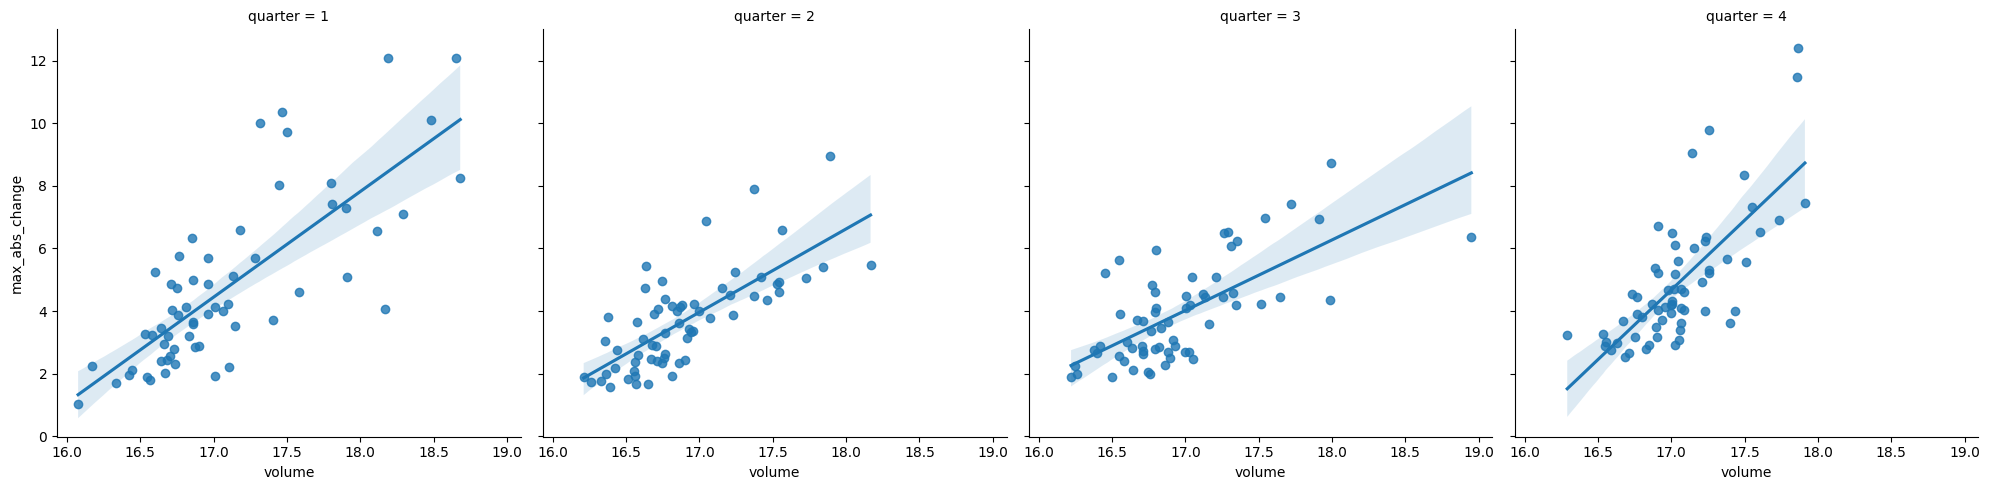

In [39]:
sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)

plt.show()

# Distributions

Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5 (in this notebook).

# boxenplot()
 
The boxenplot is a box plot that shows additional quantiles

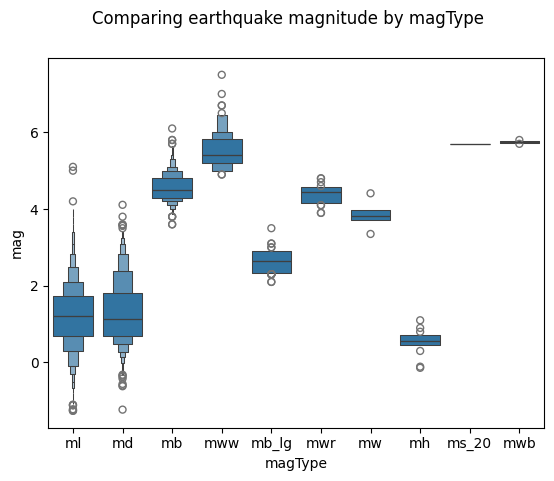

In [42]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')
# this create a boxen plot
# this take the magType and mag columns
# as x and y axis respectively
# then uses those columns again
# for the data to be taken

plt.show()

# violinplot()

Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:


C:\Users\Arnel Bulambao\AppData\Local\Temp\ipykernel_10320\577471595.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


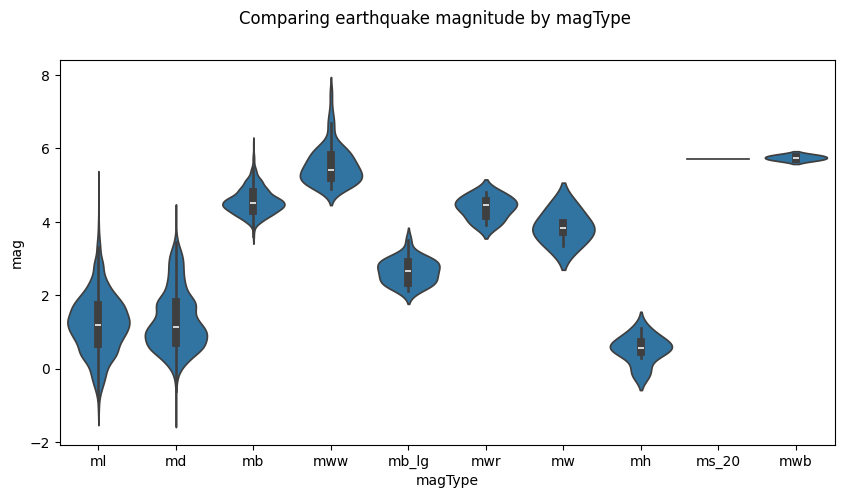

In [45]:
fig, axes = plt.subplots(figsize=(10, 5)) # 
sns.violinplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']],
 ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')
# this creates a matplotlib figure that has a 10x5 size
# this creates a violin plot 
# and uses  magType and mag columns
# as x and y axis respectively
# then uses those columns again
# for the data to be taken
# it scales the violins to be the same width with each other

plt.show()

# Faceting
We can create subplots across subsets of our data by faceting. First, we create a FacetGrid specifying how to layout the plots (which categorical column goes along the
rows and which one along the columns). Then, we call the map() method of the FacetGrid and pass in the plotting function we want to use (along with any additional
arguments).

Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed :

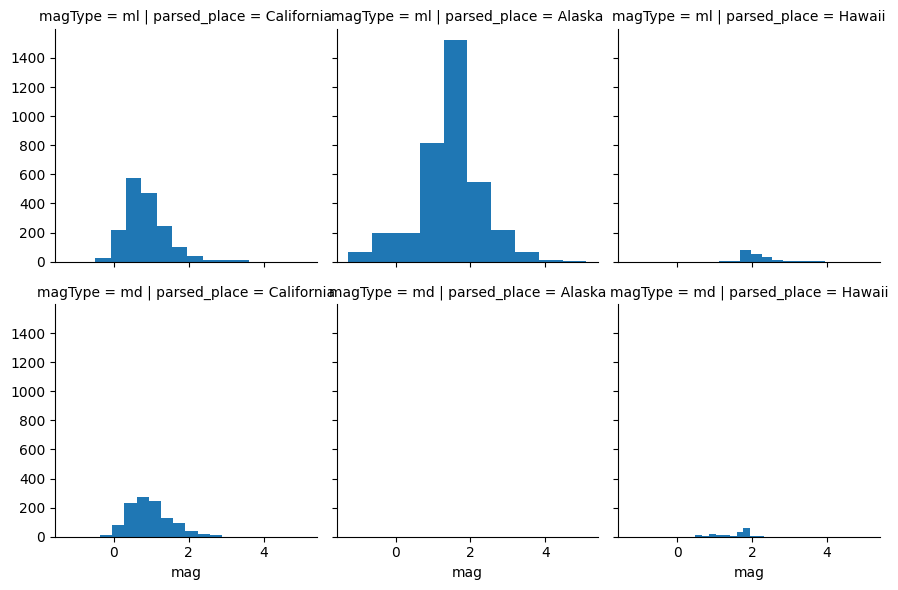

In [46]:
g = sns.FacetGrid(
 quakes[
 (quakes.parsed_place.isin([
 'California', 'Alaska', 'Hawaii'
 ]))\
 & (quakes.magType.isin(['ml', 'md']))
 ],
 row='magType',
 col='parsed_place'
)
g = g.map(plt.hist, 'mag')


plt.show()

# 9.5 Formatting Plots

# Formatting Plots

## About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).

## Setup

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)


## Titles and Axis Labels

    plt.suptitle() adds a title to plots and subplots
    
    plt.title() adds a title to a single plot. Note if you use subplots, it will only put the title on the last subplot, so you will need to use plt.suptitle()
    
    plt.xlabel() labels the x-axis
    
    plt.ylabel() labels the y-axis


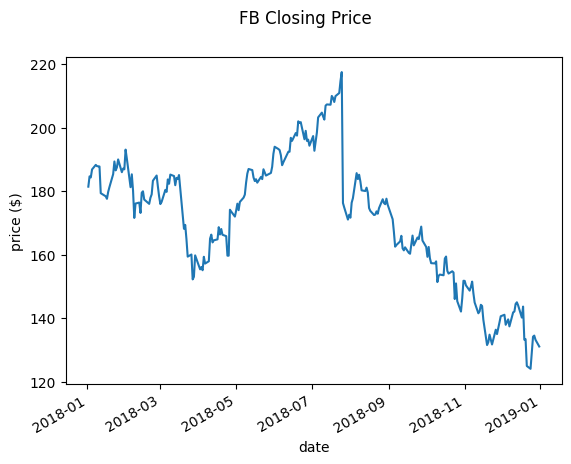

In [50]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

# this creates a plot for the close column
# of the fb database
# then places a name for the plot
# the x and y axis

plt.show()

### plt.suptitle() vs. plt.title()
Check out what happens when we call plt.title() with subplots:

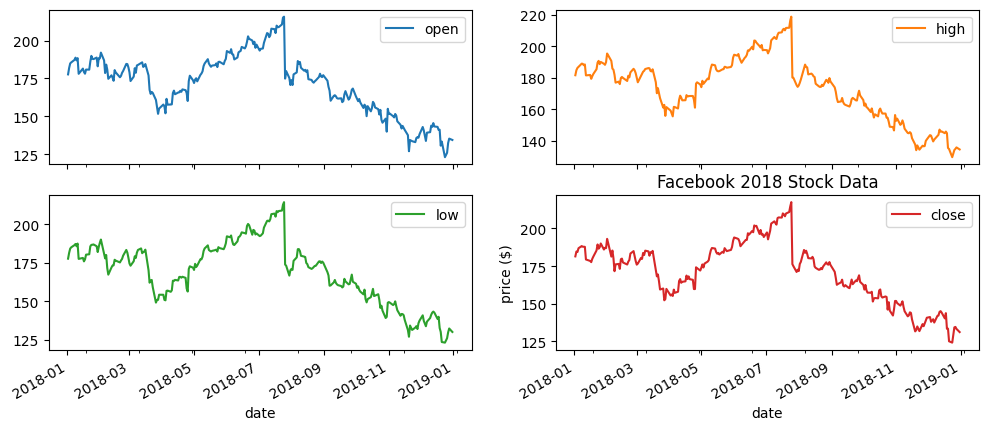

In [53]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')
# this picks the first 4 columns
# then creates a subplot for those columns
# with a 2x2 layout, 2 rows and 2 columns as seen below
# and sets the size of the each plot
# as a 12,5
plt.show()

# Legends

plt.legend() adds a legend to the plot. We can specify where to place it with the loc parameter:

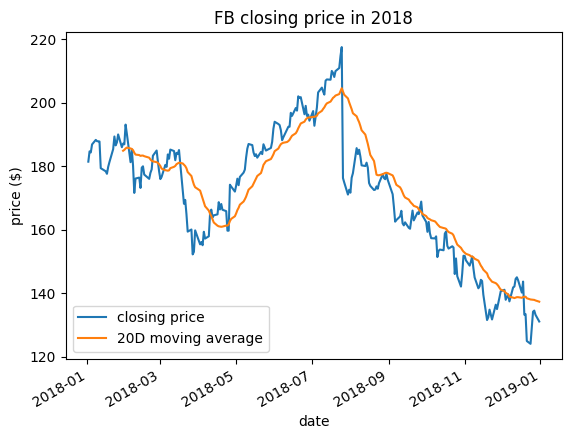

In [56]:
fb.assign(
 ma=lambda x: x.close.rolling(20).mean()
).plot(
 y=['close', 'ma'],
 title='FB closing price in 2018',
 label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

# this creates a ma column to the dataframe
# that creates a rolling window of 20 days of the close column
# and takes the mean of it

# then takes the values of close and teh created ma
# columns for the plot

plt.show()

# Formatting Axes

## Specifying axis limits

plt.xlim() and plt.ylim() can be used to specify the minimum and maximum values for the axis. Passing None will have matplotlib determine the limit.

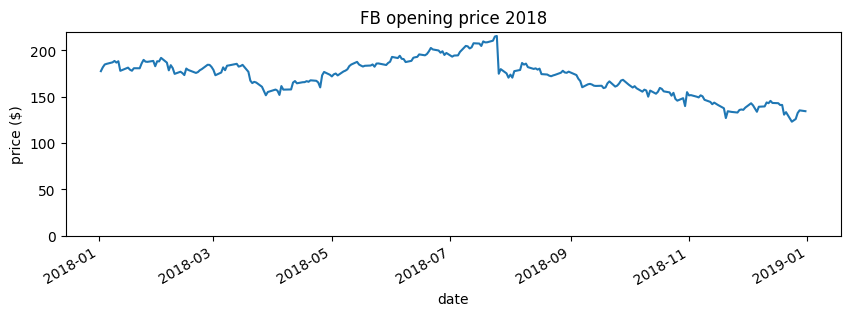

In [58]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
# this creates a plot using the open column of the fb dataframe
# with a size of 10x3
plt.ylim(0, None)
# this set the lower limit of the y axis to 0
# and upper limit to none
plt.ylabel('price ($)')
# this sets the name for the y axis

plt.show()

# Formatting the Axis Ticks

We can use plt.xticks() and plt.yticks() to provide tick labels and specify, which ticks to show. Here, we show every other month:

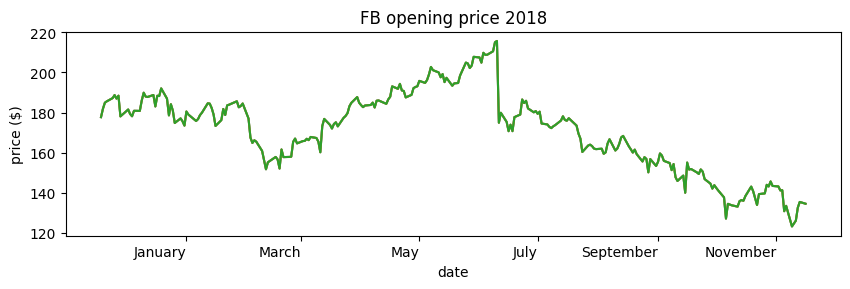

In [61]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs[:6] + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')


plt.show()

# PercentFormatter

We can use ticker.PercentFormatter and specify the denominator ( xmax ) to use when calculating the percentages. This gets passed to the
set_major_formatter() method of the xaxis or yaxis on the Axes .

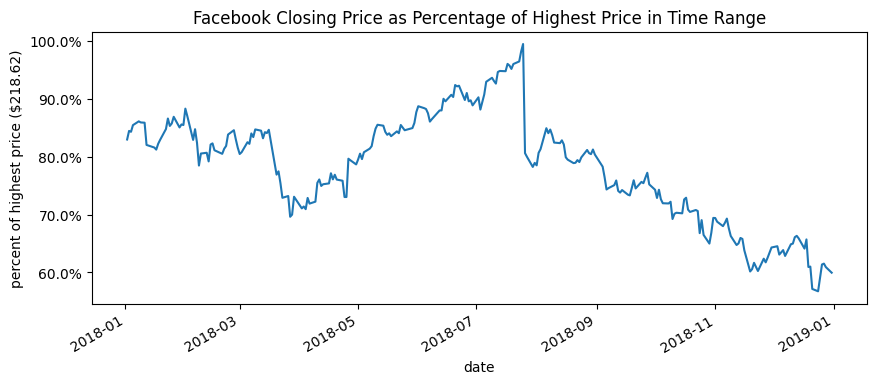

In [62]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
 figsize=(10, 4),
 title='Facebook Closing Price as Percentage of Highest Price in Time Range'
) 
# this creates a plot for the close column and places it in a variable


ax.yaxis.set_major_formatter(
 ticker.PercentFormatter(xmax=fb.high.max())
)
# 

ax.set_yticks([
 fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

plt.show()

# MultipleLocator
Say we have the following data. The points only take on integer values for x .


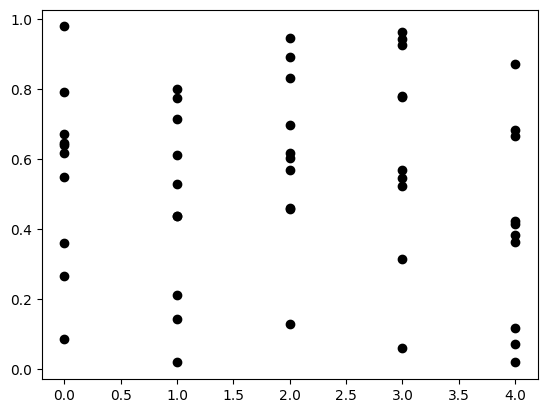

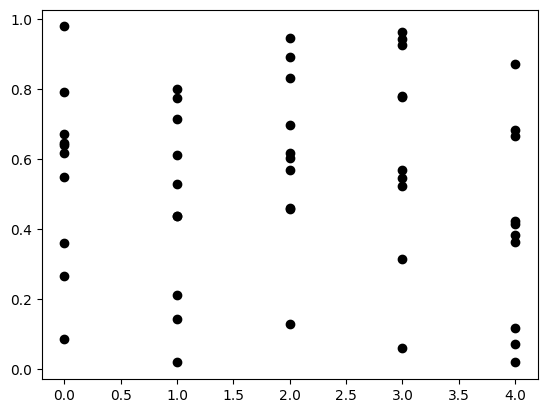

In [64]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

plt.show()

If we don't want to show decimal values on the x-axis, we can use the MultipleLocator . This will give ticks for all multiples of a number specified with the base
parameter. To get integer values, we use base=1

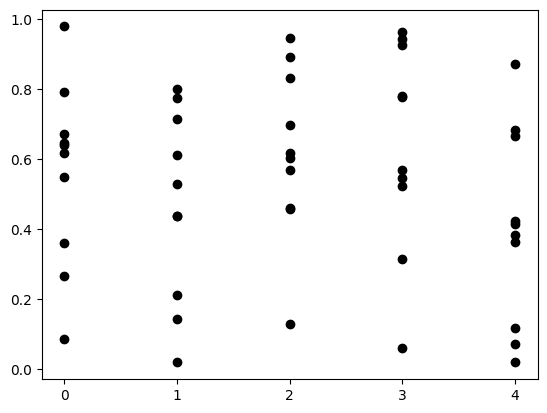

In [65]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
 ticker.MultipleLocator(base=1)
)


plt.show()

# 9.6 Customizing Visualizations

## pandas.plotting subpackage

Pandas provides some extra plotting functions for a few select plot types.

## About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).
## Setup


In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

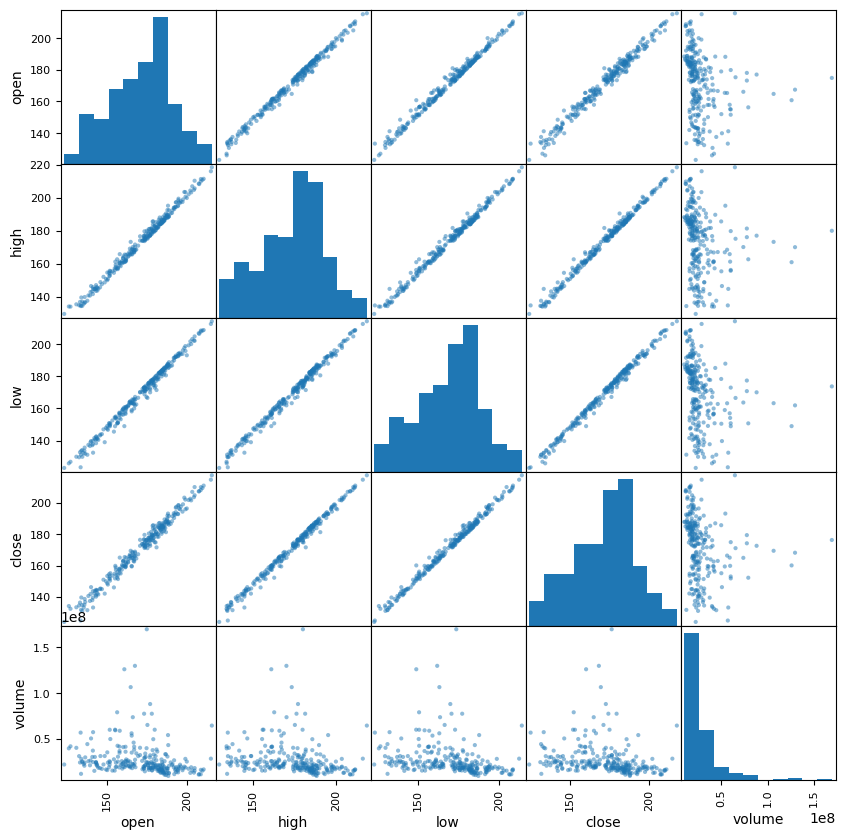

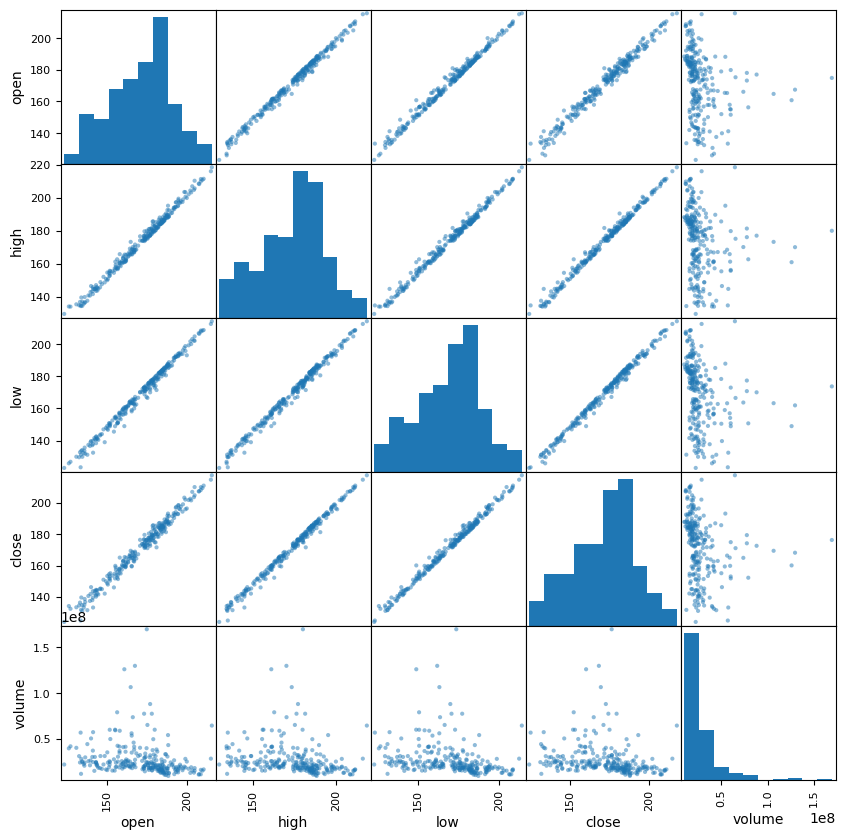

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

plt.show()

Changing the diagonal from histograms to KDE:

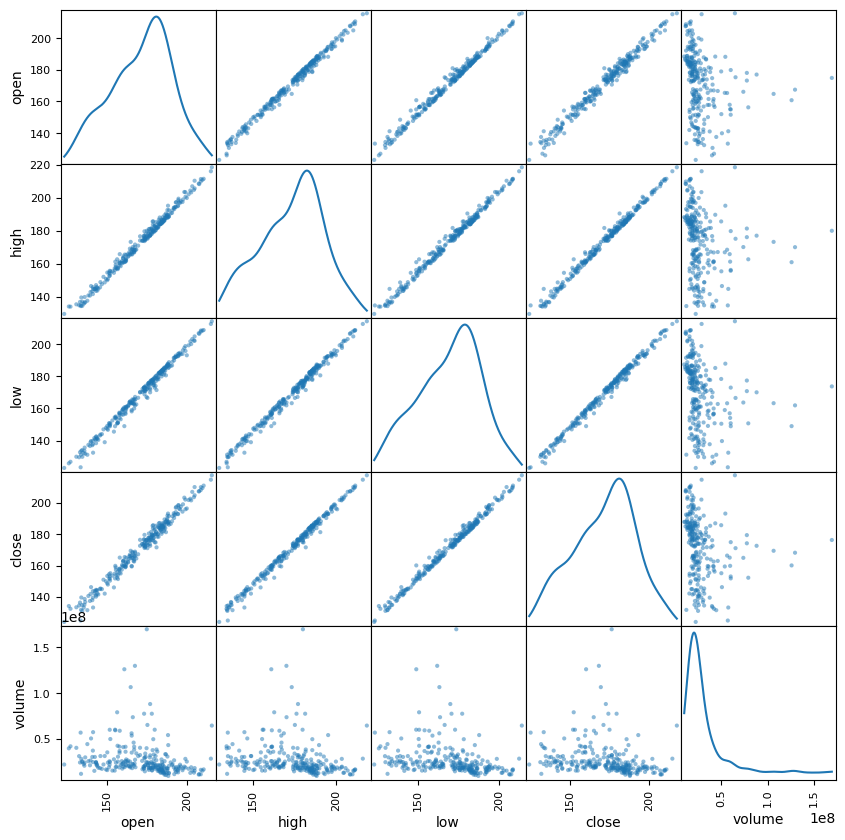

In [69]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

plt.show()

## Lag plot
Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

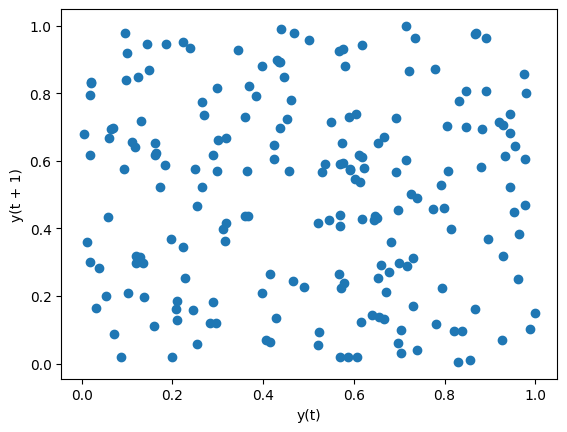

In [70]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

plt.show()

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:


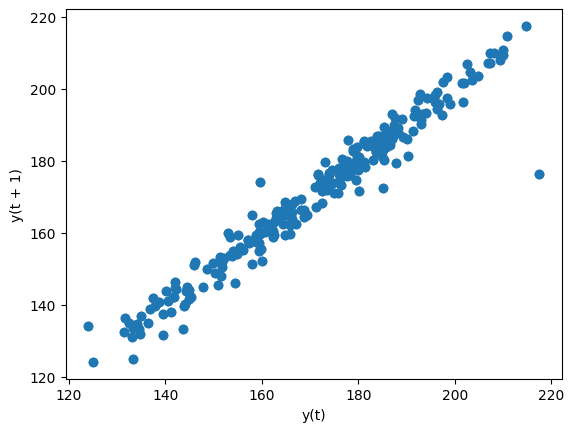

In [72]:
lag_plot(fb.close)

plt.show()

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):


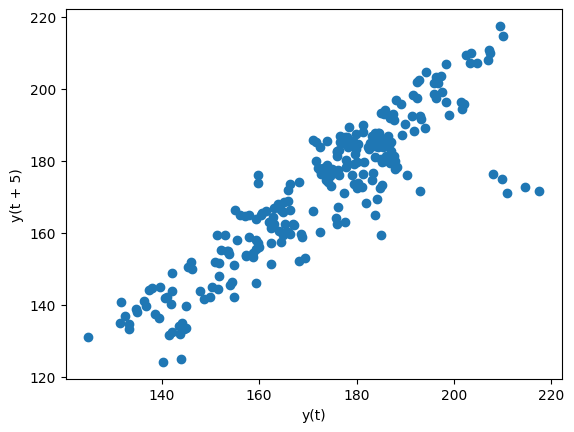

In [73]:
lag_plot(fb.close, lag=5)

plt.show()

## Autocorrelation plots

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):

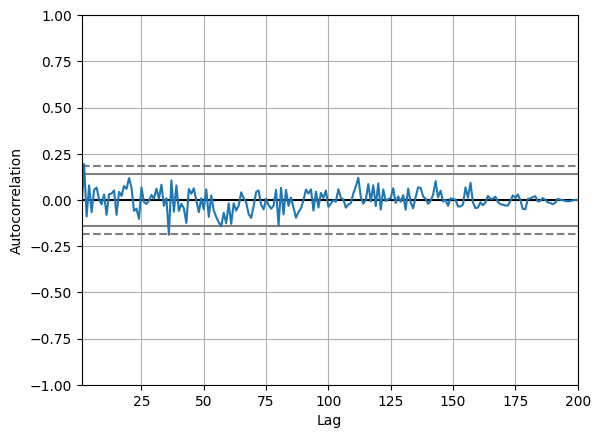

In [74]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()

Stock data, on the other hand, does have significant autocorrelation:

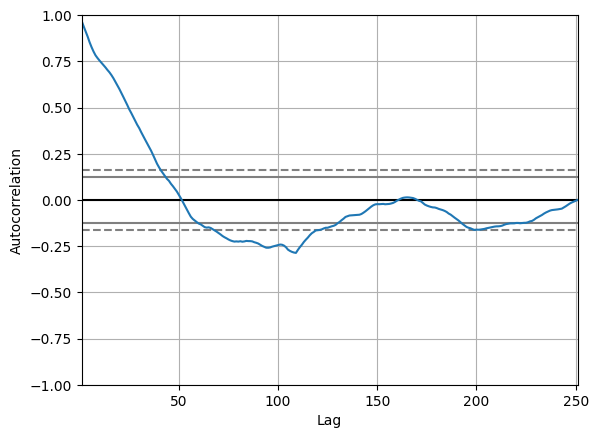

In [75]:
autocorrelation_plot(fb.close)
plt.show()

# Bootstrap plot

This plot helps us understand the uncertainty in our summary statistics:

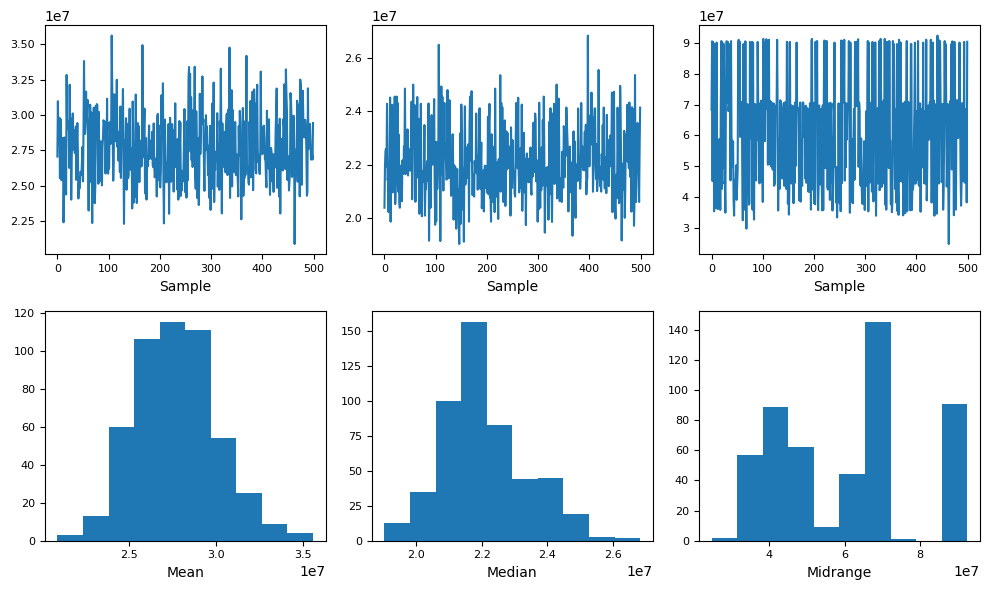

In [77]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))
plt.show()

## Data Analysis:

Provide comments on output from the procedures

## Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

<font size = 7>EXTRACTION PHASE</font>

In [28]:
# import the necessary libraries for the supplementary part
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# fb stock prices 2018

df1 = pd.read_csv('fb_stock_prices_2018.csv')

# earth quakes-1

df2 = pd.read_csv('earthquakes-1.csv')

In [29]:
df1.head()

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [32]:
df2.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


<font size = 7>TRANSFORMATION PHASE</font>

In [35]:
# in this phase we are going to clean our dataframe before we use it in the supplementary

#checking shapes
print(f'DATAFRAME1 : {df1.shape}')
print('==================================')
print(f'DATAFRAME2: {df2.shape}')

DATAFRAME1 : (251, 6)
DATAFRAME2: (9332, 6)


In [37]:
# checking if there are columns that has same name

print(f'DATAFRAME1 : {df1.columns.duplicated()}')
print('==================================')
print(f'DATAFRAME2: {df2.columns.duplicated()}')

DATAFRAME1 : [False False False False False False]
DATAFRAME2: [False False False False False False]


In [39]:
# checking if there are null values
print(f'DATAFRAME1 : {df1.isnull().sum()}')
print('==================================')
print(f'DATAFRAME2: {df2.isnull().sum()}')

DATAFRAME1 : date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64
DATAFRAME2: mag             1
magType         1
time            0
place           0
tsunami         0
parsed_place    0
dtype: int64


In [41]:
# Since there is a singel column that has missing values we are just going to drop it

df2[df2.isnull().any(axis=1)]

,mag,magType,time,place,tsunami,parsed_place
6404,NaN,NaN,1537906325240,"13km NW of Parkfield, CA",0,California


In [43]:
df2.dropna(inplace =True)

In [45]:
# now the rows that nan value are gone
df2[df2.isnull().any(axis=1)]
# lets move on to checking datatypes

,mag,magType,time,place,tsunami,parsed_place


In [47]:
#CHECKING DATATYPES

print(f'DATAFRAME1 : {df1.dtypes}')
# HERE THE DATE COLUMN IS NOT CONVERTED TO DATETIME DATATYPE LETS CHANGE IT
print('==================================')
print(f'DATAFRAME2: {df2.dtypes}')

DATAFRAME1 : date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object
DATAFRAME2: mag             float64
magType          object
time              int64
place            object
tsunami           int64
parsed_place     object
dtype: object


In [49]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes
#NOW IT IS CONVERTED TO DATETIME dtype

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [51]:
# since we are going to deal with rolling and resampling later we will set the date column as the index in dataframe 1

df1.set_index('date',inplace = True)

In [53]:
df1.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [55]:
# IG we can proceed now to the supplementary part
df2.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


<font size = 7>LOAD PHASE</font>

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb

In [62]:
# to do this we need to implement a query function where we are getting the data that has magtype of mb

quake_mb = df2.query('magType == "mb"')
# now that we have the data we can now get the tsunami and the magnitude for heatmap correlation we are just going to get those columns
quake_mb.head()

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
55,4.6,mb,1539453241120,"242km NNW of Farallon de Pajaros, Northern Mar...",0,Northern Mariana Islands
67,4.6,mb,1539448501800,"160km NNW of Nago, Japan",0,Japan
91,4.7,mb,1539437762090,"32km SE of Muisne, Ecuador",0,Ecuador


In [64]:
# now we get the columns mag and tsunami for getting the corellation
subset = quake_mb[['mag', 'tsunami']]

# Compute correlation matrix
corr_matrix = subset.corr()
corr_matrix
#here base on the output we can not put it to the heatmap

,mag,tsunami
mag,1.000000,0.448921
tsunami,0.448921,1.000000


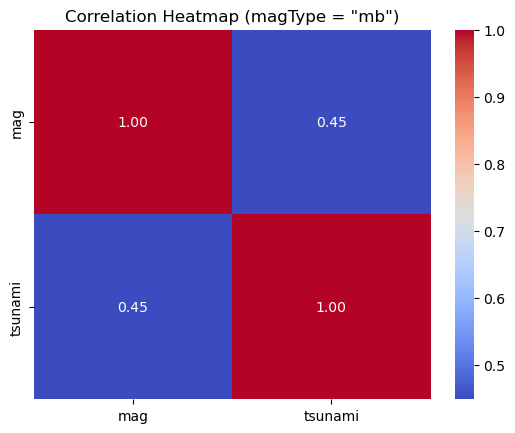

In [66]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (magType = "mb")')
plt.show()

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [69]:
# Base on my understanding we are going to create 2 box plots here 
# box plot for facebook volume 
# box plot for closing price
# also in each box plot we are going to add a refernce line 
# which will have a formula of q1 - 1.5 * iqr
# and q3 + 1.5 * iqr
# for the formula of iqr it q3 - q1
# for the bound we are just going to create function to avoid doing it redunduntly


# creating a function 

def tukey_ref_line(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    # for the inter quartile range
    IQR = q3 - q1

    # applying 2 formula for upper and lower ref line
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    # then we return the 2 values
    return lower, upper

# here we call the columns that we are going to use
volume_trade = df1['volume']
close_price = df1['close']


vol_lower_ref, vol_upper_ref = tukey_ref_line(volume_trade)
clo_lower_ref, clo_upper_ref = tukey_ref_line(close_price)


print(vol_lower_ref, vol_upper_ref)
print(clo_lower_ref, clo_upper_ref)
# here we can see that we are able to get the values of our reference line
#time to apply it into the boxplot

-899775.0 49042009.0
116.88250000000008 226.30249999999992


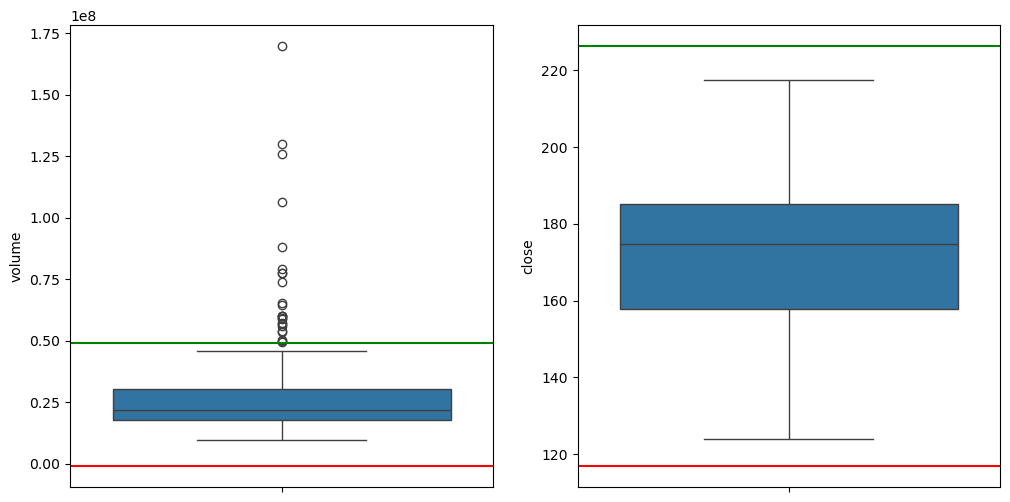

In [71]:
# lets create a subplot using matplotlib

fig,axes = plt.subplots(1,2, figsize= (12,6))
# for axes0 or the box plot 1 we insert the volume column
sns.boxplot(volume_trade, ax = axes[0])

# for the lower reference line
axes[0].axhline(vol_lower_ref, color = 'red')
# for the upper refernce line
axes[0].axhline(vol_upper_ref, color = 'green')


# for the axes1 or the second column box plot we insert the column closing price
sns.boxplot(close_price, ax = axes[1])

# for the lower reference line
axes[1].axhline(clo_lower_ref, color = 'red')
# for the upper reference line
axes[1].axhline(clo_upper_ref, color = 'green')

plt.show()


3. Fill in the area between the bounds in the plot from exercise #2.


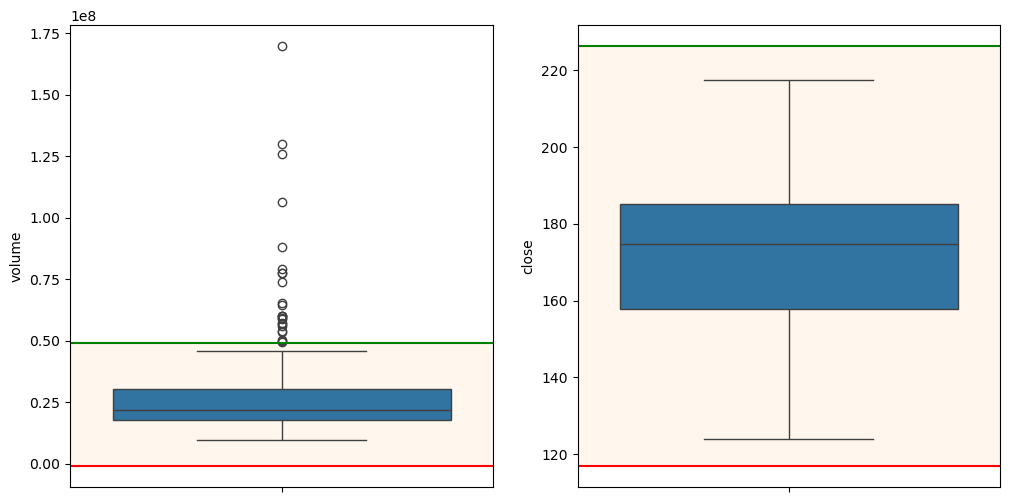

In [74]:
# for these number we are just going to reuse our recent boxplot code
# here we are just going to apply a shading in the area between the bounds

fig,axes = plt.subplots(1,2, figsize= (12,6))

sns.boxplot(volume_trade, ax = axes[0])
axes[0].axhline(vol_lower_ref, color = 'red')
axes[0].axhline(vol_upper_ref, color = 'green')
# here we use axhspan function
# our min here is the lower ref
# oour max is the upper ref
# is use color bisque as the color for shading
axes[0].axhspan(vol_lower_ref, vol_upper_ref, color = 'bisque', alpha = 0.3)  #I use alpha 0.3 so that the shading is hindi makapal



sns.boxplot(close_price, ax = axes[1])
axes[1].axhline(clo_lower_ref, color = 'red')
axes[1].axhline(clo_upper_ref, color = 'green')
axes[1].axhspan(clo_lower_ref, clo_upper_ref, color = 'bisque', alpha = 0.3) # same thing here
plt.show()


4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price

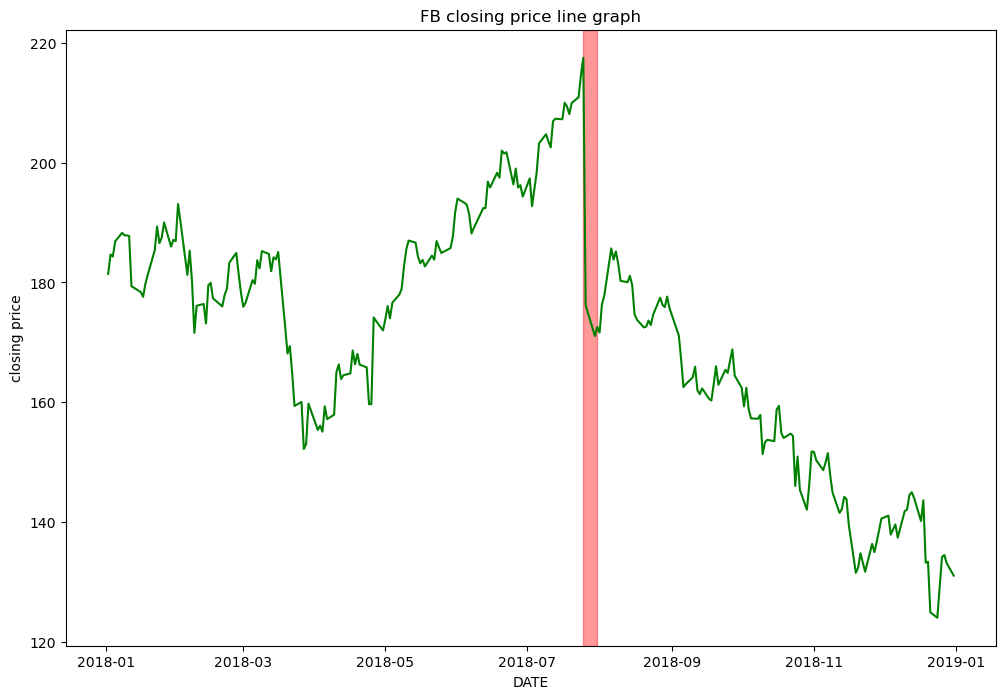

In [77]:
# Since we are only concerned withg the closing price column we are just going to get that column for plotting
graph1 = df1['close']

# now we will plot it in line graph
# inorder for us to insert an axvspan into our graph
# we will need to insert in into a axe
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(graph1, color = 'green')
#In this phase we our min will be the date 2018-07-25 and our max date is the 2018-07-31
ax.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color = 'red', alpha = 0.4)
plt.title('FB closing price line graph')
plt.xlabel('DATE')
plt.ylabel('closing price')
plt.show()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:

    Disappointing user growth announced after close on July 25, 2018
    
    Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
    
    FTC launches investigation on March 20, 2018

In [86]:
# Inorder to do this we need to create a new dataframe name df3
df3 = {
    'date':['2018-07-25', '2018-03-19', '2018-03-20'],
    'event':['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation']
}

df3 = pd.DataFrame(df3)

df3.head()

,date,event
0,2018-07-25,Disappointing user growth announced after close.
1,2018-03-19,Cambridge Analytica story
2,2018-03-20,FTC investigation


In [88]:
# we also need to set the date column in datetime datatype

df3['date'] = pd.to_datetime(df3['date'])
df3.dtypes

date     datetime64[ns]
event            object
dtype: object

In [90]:
# we need to set the date colum a our index
df3.set_index('date',inplace = True)

In [92]:
# now we set the date as our index we can now merge it with the orginal dataframe
df3

,event
date,
2018-07-25,Disappointing user growth announced after close.
2018-03-19,Cambridge Analytica story
2018-03-20,FTC investigation


In [94]:
# we will merge it in outer it doesnt matter if we have nan values in columns event because we have no information in that day
merge_df = df1.merge(df3, on = 'date',how = 'outer')

# we can see in the output that we successfull merge the 2 dataframes
merge_df = merge_df.sort_index()

# lets look in some events
merge_df.loc['2018-03-19':'2018-03-20']

,open,high,low,close,volume,event
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,Cambridge Analytica story
2018-03-20,167.47,170.20,161.95,168.15,129851768,FTC investigation


In [96]:
# here lets extract the data that we need for plotting and annotate

closing = merge_df['close']

# here we get the date of events and drop the nulls
annotate = merge_df['event']
annotate.dropna(inplace= True)

annotate

date
2018-03-19                           Cambridge Analytica story
2018-03-20                                   FTC investigation
2018-07-25    Disappointing user growth announced after close.
Name: event, dtype: object

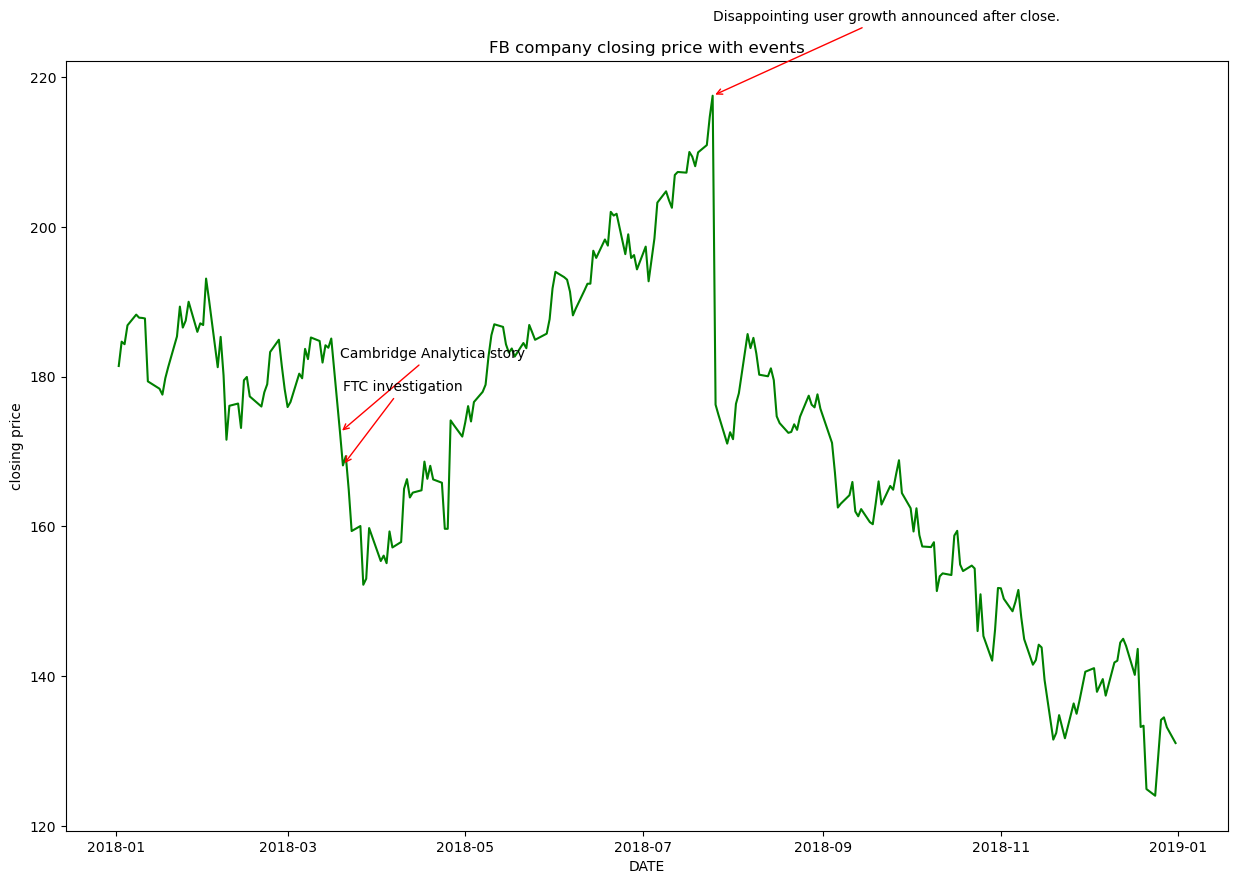

In [98]:
# here we are going to insert our line  graph into an axe so we can annotate an event
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(closing, color = 'green')

# for the anontation we are going to creat a iteration
# since we are going to get each date and each event and insert it into the ax.anotate function
for date, event in annotate.items(): # using the items() we during our iterartion we can get the date index and the value
    ax.annotate(event, #here we insert the event
                xy= (date, closing.loc[date]), # for the xy part this will be the indicator where we are going to insert the text event
                xytext = (date, closing.loc[date]+ 10), #for the xytext this will be show how far the text will show from the original distance
                arrowprops = dict(arrowstyle='->', color='red') # this part refers to the arrow style of the anotation
               )
plt.title('FB company closing price with events')
plt.xlabel('DATE')
plt.ylabel('closing price')
plt.show()

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own

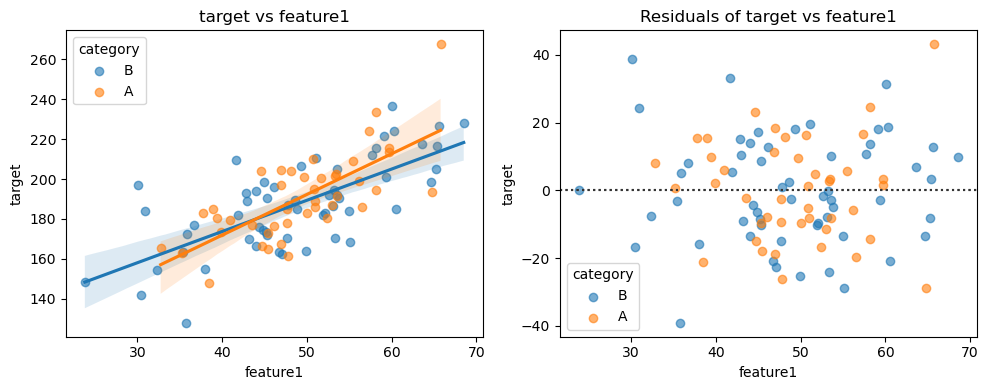

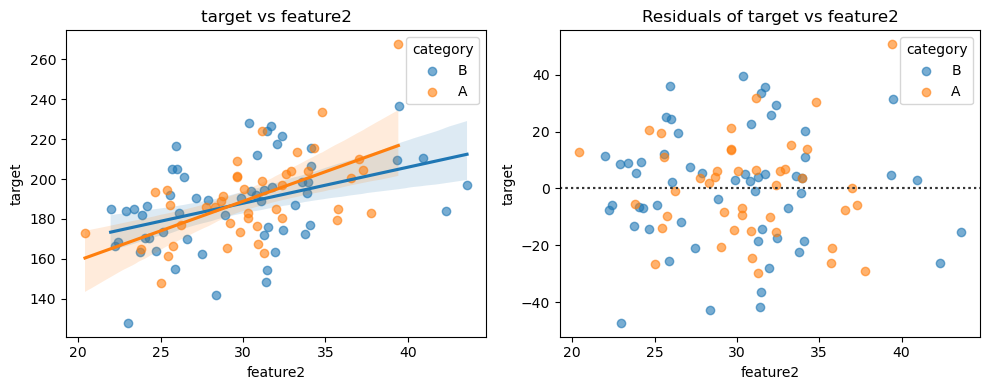

In [108]:

# Sir sorry po diko po maintindihan yung problem
# Di ko po ma gets yung gagawin

def reg_resid_plots(data, x_vars, y_var, hue=None):
    for x in x_vars:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        if hue:
            for level in data[hue].unique():
                subset = data[data[hue] == level]
                sns.regplot(data=subset, x=x, y=y_var, ax=ax1, label=level, scatter_kws={'alpha': 0.6})
                sns.residplot(data=subset, x=x, y=y_var, ax=ax2, label=level, scatter_kws={'alpha': 0.6})
            ax1.legend(title=hue)
            ax2.legend(title=hue)
        else: 
            sns.regplot(data=data, x=x, y=y_var, ax=ax1, scatter_kws={'alpha': 0.6})
            sns.residplot(data=data, x=x, y=y_var, ax=ax2, scatter_kws={'alpha': 0.6})
        ax1.set_title(f'{y_var} vs {x}')
        ax2.set_title(f'Residuals of {y_var} vs {x}')
        plt.tight_layout()
        plt.show()


np.random.seed(42)
n = 100
df = pd.DataFrame({
    'feature1': np.random.normal(50, 10, n),
    'feature2': np.random.normal(30, 5, n),
    'category': np.random.choice(['A', 'B'], n)
})
df['target'] = 2 * df['feature1'] + 3 * df['feature2'] + np.random.normal(0, 10, n)

reg_resid_plots(df, ['feature1', 'feature2'], 'target', hue='category')

## Summary/Conclusion:

    Provide a summary of your learnings and the conclusion for this activity.

- after copying and running the code from the given pdf, and after performing the supplementary question. I can say that I was able to learn plotting graphs using the seaborn library. I was able to create a different kinds of graphs using it. Additionally, I was able to create a anotations in the graph and implement the reference line in my graphs.  For me I was having hard time using this library wherein i need to look in my notes several times when im doing the plotting part.